In [33]:
# Risk, Bayes Risk
# Bias-Variance decomposition
# Overfitting/Underfitting
#
# Faïcel Chamroukhi
##############
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.polynomial.polynomial import Polynomial

# Set plot font size
plt.rcParams.update({'font.size': 16})


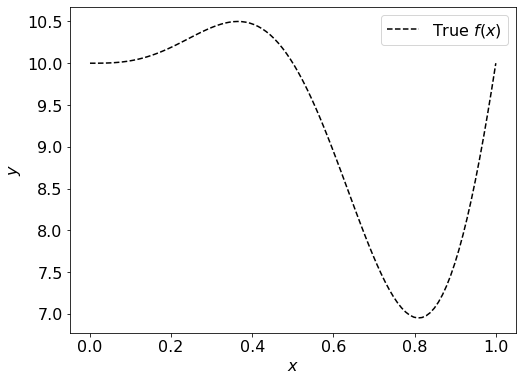

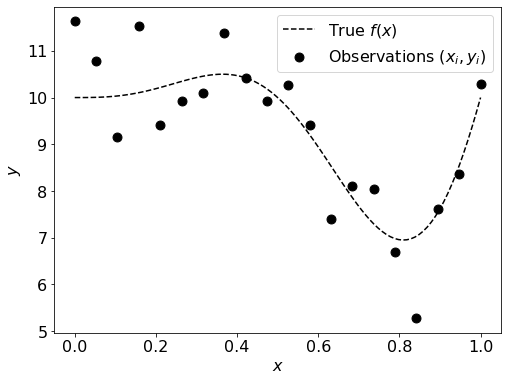

In [34]:
# Data Generating Process
def f(x):
    """ True function definition """
    return 10 + 5 * x**2 * np.sin(2 * np.pi * x)

# Plot the true function
x_plot = np.linspace(0, 1, 100)  # High-resolution x values for plotting
plt.figure(figsize=(8,6))
plt.plot(x_plot, f(x_plot), 'k--', linewidth=1.5, label='True $f(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper right')
plt.show()

# Generating training data
n = 20
x = np.linspace(0, 1, n)  # Fixed x values

# Noise parameters
mu_e = 0
sigma_e = 1
e = np.random.normal(mu_e, sigma_e, n)


# Generate sample observations
y = f(x) + e



# Plot the observed data with the true function
plt.figure(figsize=(8,6))
plt.plot(x_plot, f(x_plot), 'k--', linewidth=1.5, label='True $f(x)$')
plt.scatter(x, y, color='k', s=80, label='Observations $(x_i, y_i)$')
#plt.scatter(x, y, marker='o', facecolors='none', edgecolors='k', s=80, label='Observations $(x_i, y_i)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

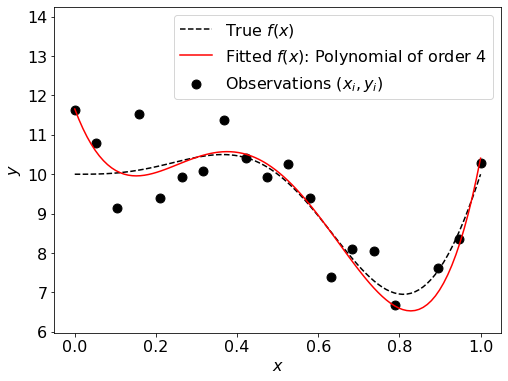

In [35]:
# Polynomial Regression with different degrees
p = 4  # Polynomial order
beta_OLS = np.polyfit(x, y, p)  # Fit polynomial regression
f_hat = np.poly1d(beta_OLS)  # Create polynomial function

# Plot fitted function
plt.figure(figsize=(8,6))
plt.plot(x_plot, f(x_plot), 'k--', linewidth=1.5, label='True $f(x)$')
plt.scatter(x, y, color='k', s=80, label='Observations $(x_i, y_i)$')
plt.plot(x_plot, f_hat(x_plot), 'r-', linewidth=1.5, label=f'Fitted $f(x)$: Polynomial of order {p}')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim([np.mean(y)-2*np.std(y), np.mean(y)+3*np.std(y)])
plt.legend()
plt.show()

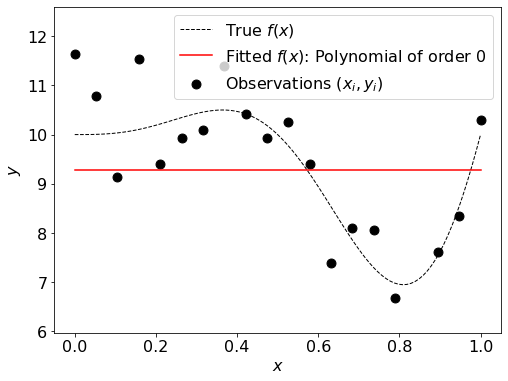

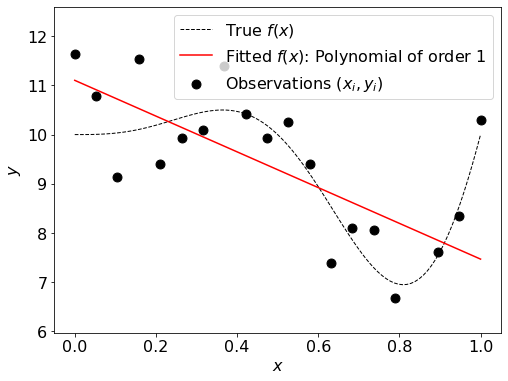

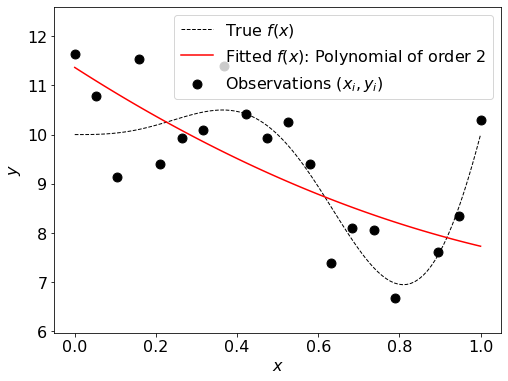

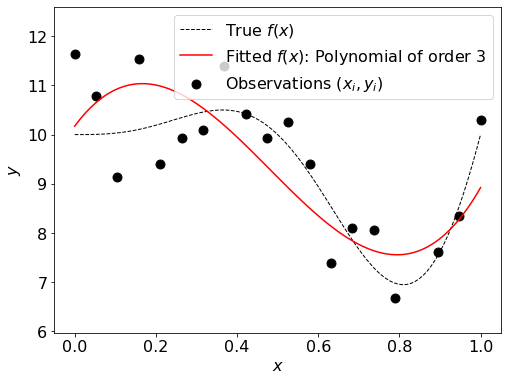

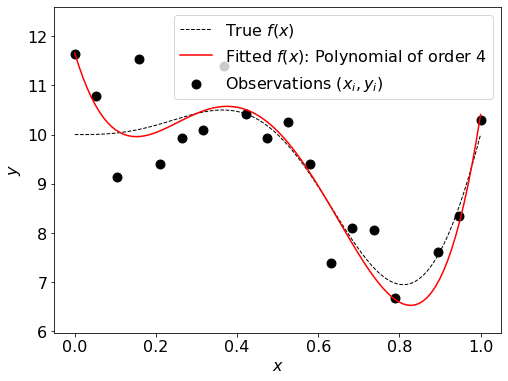

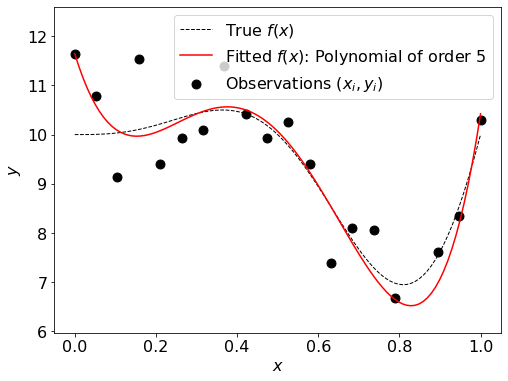

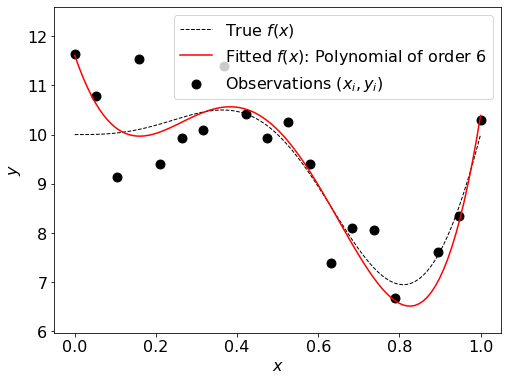

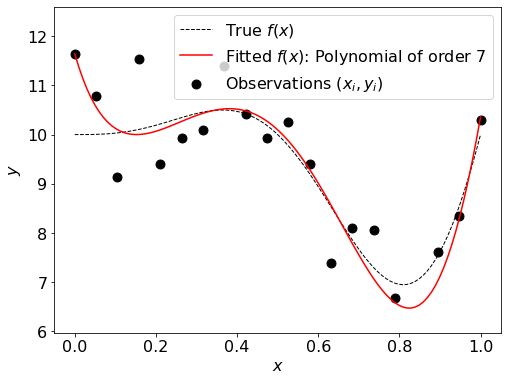

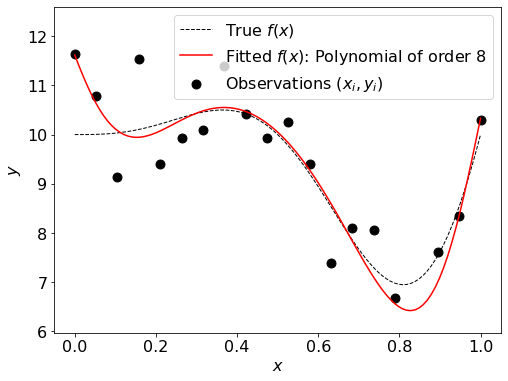

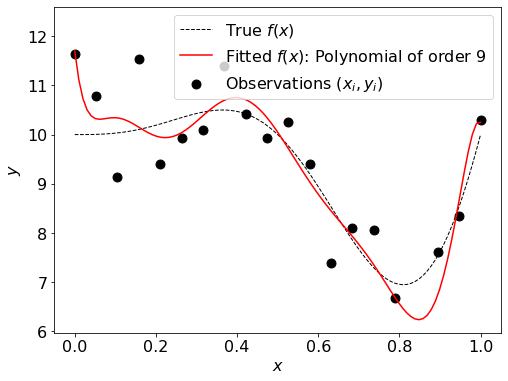

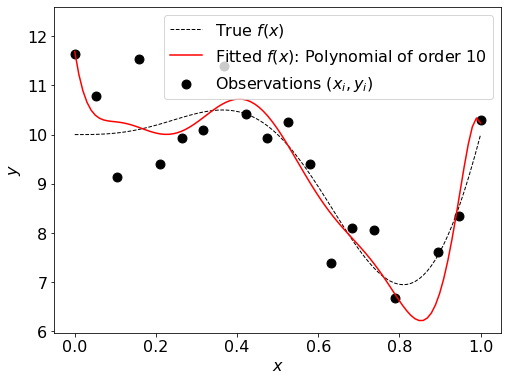

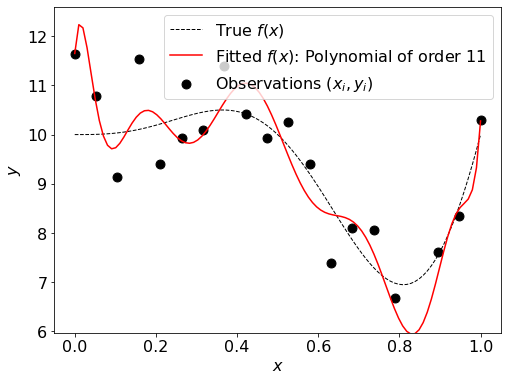

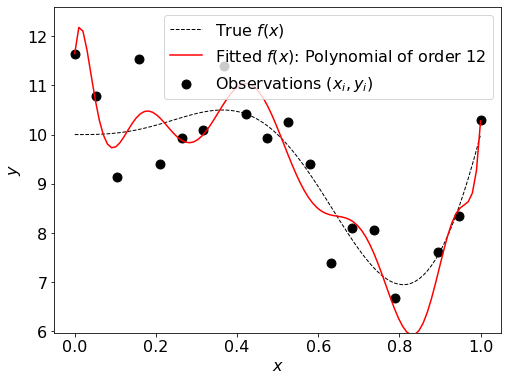

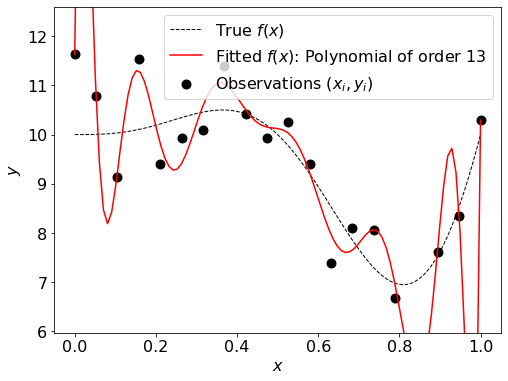

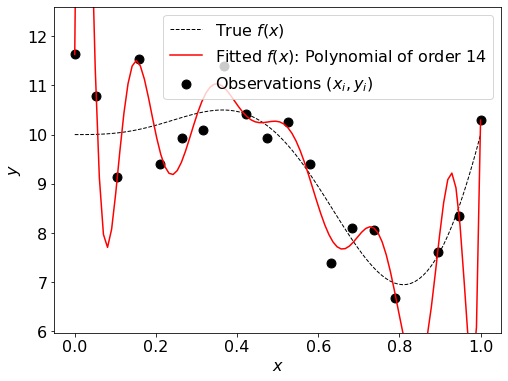

In [36]:
# Loop over polynomial degrees from 0 to p_max
p_max = 14
for p in range(p_max + 1):
    beta_OLS = np.polyfit(x, y, p)
    f_hat = np.poly1d(beta_OLS)
    
    plt.figure(figsize=(8,6))
    plt.plot(x_plot, f(x_plot), 'k--', linewidth=1, label='True $f(x)$')
    plt.scatter(x, y, color='k', s=80, label='Observations $(x_i, y_i)$')
    plt.plot(x_plot, f_hat(x_plot), 'r-', linewidth=1.5, label=f'Fitted $f(x)$: Polynomial of order {p}')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.ylim([np.mean(y)-2*np.std(y), np.mean(y)+2*np.std(y)])
    plt.legend()
    plt.show()

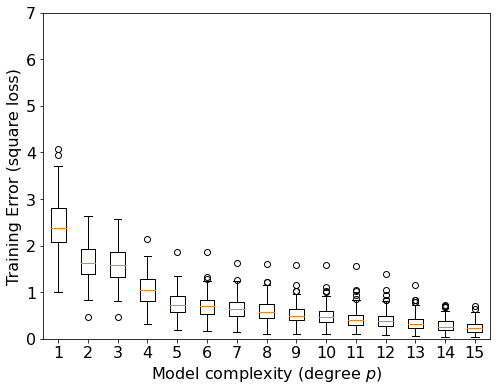

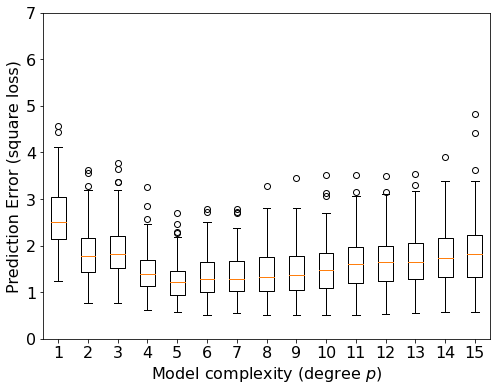

In [37]:
# Experimenting with multiple samples
N = 100  # Number of replicates
Training_error = np.zeros((N, p_max + 1))
Testing_error = np.zeros((N, p_max + 1))

Hx = np.zeros((n, p_max + 1, N))
Fx = np.zeros((n, p_max + 1, N))

# Fixed design for training and testing
x_train = np.linspace(0, 1, n)
x_test = np.linspace(1/n, 1, n)

for sample in range(N):
    y_train = f(x_train) + np.random.normal(mu_e, sigma_e, n)
    y_test = f(x_test) + np.random.normal(mu_e, sigma_e, len(x_test))

    for p in range(p_max + 1):
        beta_OLS = np.polyfit(x_train, y_train, p)
        f_hat = np.poly1d(beta_OLS)

        Training_error[sample, p] = np.mean((y_train - f_hat(x_train))**2)
        Testing_error[sample, p] = np.mean((y_test - f_hat(x_test))**2)

        Fx[:, p, sample] = f(x_test)
        Hx[:, p, sample] = f_hat(x_test)

# Boxplot of Training and Testing Errors
plt.figure(figsize=(8,6))
plt.boxplot(Training_error)
plt.xlabel('Model complexity (degree $p$)')
plt.ylabel('Training Error (square loss)')
plt.ylim([0, 7])
plt.show()

plt.figure(figsize=(8,6))
plt.boxplot(Testing_error)
plt.xlabel('Model complexity (degree $p$)')
plt.ylabel('Prediction Error (square loss)')
plt.ylim([0, 7])
plt.show()

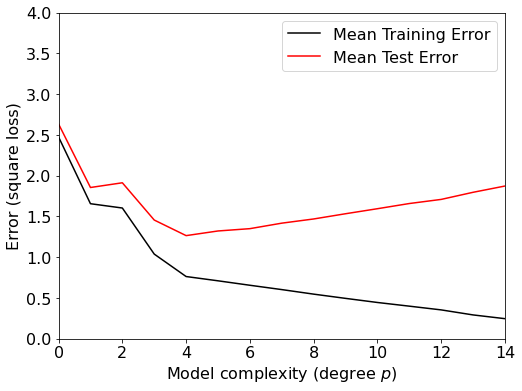

In [38]:
# Compute mean errors
mean_training_error = np.mean(Training_error, axis=0)
mean_testing_error = np.mean(Testing_error, axis=0)

# Plot mean errors
plt.figure(figsize=(8,6))
plt.plot(range(p_max + 1), mean_training_error, 'k', linewidth=1.5, label='Mean Training Error')
plt.plot(range(p_max + 1), mean_testing_error, 'r', linewidth=1.5, label='Mean Test Error')
plt.xlabel('Model complexity (degree $p$)')
plt.ylabel('Error (square loss)')
plt.xlim([0, p_max])
plt.ylim([0, 4])
plt.legend()
plt.show()

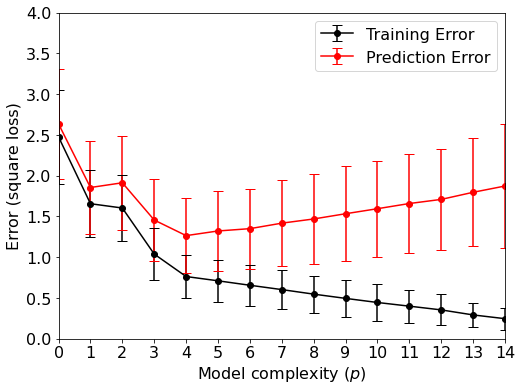

In [39]:
## Error bars

plt.figure(figsize=(8,6))

# Plot training error with error bars
plt.errorbar(
    range(p_max + 1), 
    mean_training_error, 
    yerr=np.std(Training_error, axis=0), 
    fmt='ko-', capsize=5, label='Training Error'
)

# Plot testing error with error bars
plt.errorbar(
    range(p_max + 1), 
    mean_testing_error, 
    yerr=np.std(Testing_error, axis=0), 
    fmt='ro-', capsize=5, label='Prediction Error'
)

# Formatting the plot
plt.xticks(range(p_max + 1))
plt.xlim([0, p_max])
plt.ylim([0, 4])
plt.xlabel('Model complexity ($p$)')
plt.ylabel('Error (square loss)')
plt.legend(loc='upper right')

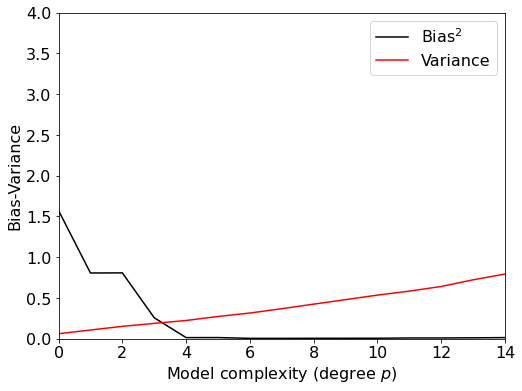

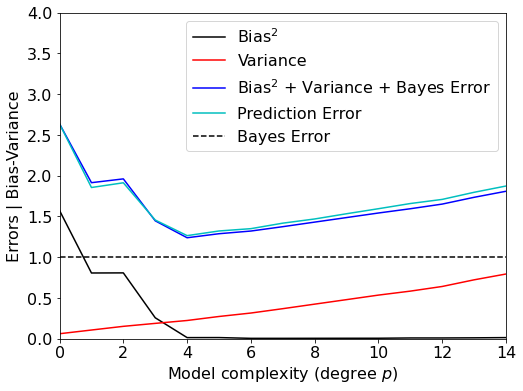

In [40]:
# Compute Bias-Variance decomposition
E_h = np.mean(Hx, axis=2)  # Expected prediction over all replicates
Bias2 = np.mean((E_h[:, :, np.newaxis] - Fx) ** 2, axis=2)
Variance = np.mean((E_h[:, :, np.newaxis] - Hx) ** 2, axis=2)

Bias2 = np.mean(Bias2, axis=0)  # Bias squared
Variance = np.mean(Variance, axis=0)  # Variance

# Plot Bias and Variance
plt.figure(figsize=(8,6))
plt.plot(range(p_max + 1), Bias2, 'k', linewidth=1.5, label='Bias$^2$')
plt.plot(range(p_max + 1), Variance, 'r', linewidth=1.5, label='Variance')
plt.xlabel('Model complexity (degree $p$)')
plt.ylabel('Bias-Variance')
plt.xlim([0, p_max])
plt.ylim([0, 4])
plt.legend()
plt.show()

# Bayes Error
Bayes_error = sigma_e**2

# Plot full bias-variance tradeoff
plt.figure(figsize=(8,6))
plt.plot(range(p_max + 1), Bias2, 'k', linewidth=1.5, label='Bias$^2$')
plt.plot(range(p_max + 1), Variance, 'r', linewidth=1.5, label='Variance')
plt.plot(range(p_max + 1), Bias2 + Variance + Bayes_error, 'b', linewidth=1.5, label='Bias$^2$ + Variance + Bayes Error')
plt.plot(range(p_max + 1), mean_testing_error, 'c', linewidth=1.5, label='Prediction Error')
plt.plot([0, p_max], [Bayes_error, Bayes_error], 'k--', linewidth=1.5, label='Bayes Error')
plt.xlabel('Model complexity (degree $p$)')
plt.ylabel('Errors | Bias-Variance')
plt.xlim([0, p_max])
plt.ylim([0, 4])
plt.legend()
plt.show()


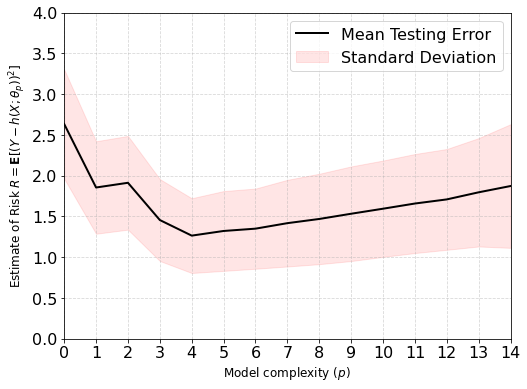

In [41]:
# Ensure x-axis values match the number of error values
x_vals = np.arange(p_max + 1)  # Correct x values

# Compute standard deviation of testing error
std_testing_error = np.std(Testing_error, axis=0)

## Check dimensions before plotting
#print("x_vals shape:", x_vals.shape)
#print("mean_testing_error shape:", mean_testing_error.shape)
#print("std_testing_error shape:", std_testing_error.shape)

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot shaded region for standard deviation
ax.fill_between(x_vals, 
                mean_testing_error - std_testing_error, 
                mean_testing_error + std_testing_error, 
                color='red', alpha=0.1, label='Standard Deviation')

# Plot mean testing error
ax.plot(x_vals, mean_testing_error, 'k-', linewidth=2, label='Mean Testing Error')

# Formatting
ax.set_xticks(x_vals)
ax.set_xlim([0, p_max])
ax.set_ylim([0, 4])
ax.set_xlabel(r'Model complexity ($p$)', fontsize=12)
ax.set_ylabel(r'Estimate of Risk $R = {\bf E}[(Y - h(X;\theta_p))^2]$', fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()
